In [1]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from osgeo import gdal

In [3]:
# Load NDVI data from the TIFF file
sub_image = gdal.Open('C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project-main\\Docs\\NDVI-Data\\NDVI_RUH-B4-B8_2023-12-19.tif')
NDVI = sub_image.GetRasterBand(1)
NDVI_array = NDVI.ReadAsArray()
ndvi_processed_all = np.nan_to_num(NDVI_array, nan=0.01)

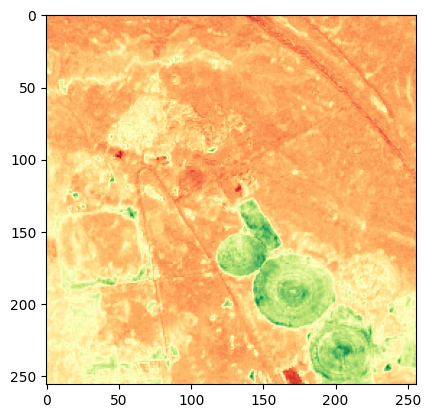

In [6]:
sub_image = "C:\\Users\\Musae\\Documents\\GitHub-REPOs\\Senior-project-main\\Docs\\sub_images\\RUH_2018-12-15_0_14.npy"
# Load the sub-image as a NumPy array
sub_image = np.load(sub_image)
ndvi_processed_all = np.nan_to_num(sub_image, nan=0.01)
plt.imshow(ndvi_processed_all,cmap='RdYlGn')

In [7]:


def cluster_image(ndvi_processed_all, n_clusters):
    """
    Clusters the image using Agglomerative Hierarchical Clustering and reshapes the labels to the original image shape.
    """
    if ndvi_processed_all.ndim == 3:
        original_shape = ndvi_processed_all.shape[:2]
        pixels = ndvi_processed_all.reshape(-1, ndvi_processed_all.shape[2])
    elif ndvi_processed_all.ndim == 2:
        original_shape = ndvi_processed_all.shape
        pixels = ndvi_processed_all.flatten().reshape(-1, 1)
    else:
        raise ValueError("Unsupported image dimensionality. Image must be 2D or 3D.")

    clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward').fit(pixels)
    return clustering.labels_.reshape(original_shape)

def plot_clustered_image(clustered_img, n_clusters):
    """
    Plots the clustered image.
    """
    plt.figure(figsize=(10, 10))
    plt.imshow(clustered_img, cmap='RdYlGn')
    plt.title(f'Image clustered into {n_clusters} clusters')
    plt.axis('off')
    plt.show()

def plot_dendrogram(model, **kwargs):
    """
    Creates a dendrogram plot for hierarchical clustering.
    """
    # Create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # Leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


c:\Users\Musae\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


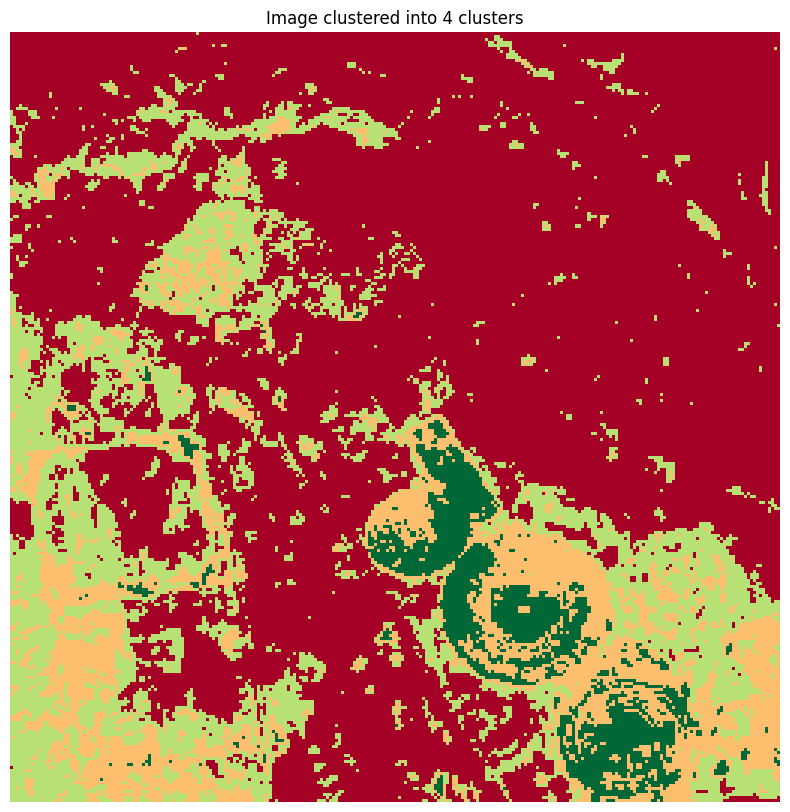

In [8]:
n_clusters = 4
clustered_labels = cluster_image(ndvi_processed_all, n_clusters)
plot_clustered_image(clustered_labels, n_clusters)
